In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
print('start')

start


In [3]:
import tensorflow
from tensorflow import keras
from keras import layers
from keras.layers import *
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

In [4]:
batch_size=32
image_size=(256, 256)

In [5]:
ds = tensorflow.keras.utils.image_dataset_from_directory(
    '/kaggle/input/tomatoleaf/tomato/train',
    labels= 'inferred',
    label_mode = 'int',
    batch_size= batch_size,
    image_size=image_size,
    shuffle=True
)
val_ds = tensorflow.keras.utils.image_dataset_from_directory(
    '/kaggle/input/tomatoleaf/tomato/val',
    labels= 'inferred',
    label_mode = 'int',
    batch_size= batch_size,
    image_size=image_size,
    shuffle = True
)

Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


In [6]:
split_size = int(len(ds)*0.8)
train_ds = ds.take(split_size)
test_ds = ds.skip(split_size)

In [7]:
ds.class_names, val_ds.class_names

(['Tomato___Bacterial_spot',
  'Tomato___Early_blight',
  'Tomato___Late_blight',
  'Tomato___Leaf_Mold',
  'Tomato___Septoria_leaf_spot',
  'Tomato___Spider_mites Two-spotted_spider_mite',
  'Tomato___Target_Spot',
  'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
  'Tomato___Tomato_mosaic_virus',
  'Tomato___healthy'],
 ['Tomato___Bacterial_spot',
  'Tomato___Early_blight',
  'Tomato___Late_blight',
  'Tomato___Leaf_Mold',
  'Tomato___Septoria_leaf_spot',
  'Tomato___Spider_mites Two-spotted_spider_mite',
  'Tomato___Target_Spot',
  'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
  'Tomato___Tomato_mosaic_virus',
  'Tomato___healthy'])

In [ ]:
plt.figure(figsize=(13, 8))
for image, label in ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(np.array(image[i].numpy().astype(int)))
        plt.title(ds.class_names[label[i].numpy()])
        plt.axis('OFF');

### FINE TUNING WITH VGG 16

In [9]:
vgg16 = VGG16(weights='imagenet',
             include_top=False,
             input_shape=(image_size[0], image_size[1], 3)
             )

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [10]:
vgg16.trainable = False

In [11]:
# len(ds.class_names)

In [12]:
flatten_layer= Flatten()(vgg16.output)
batch_norm = BatchNormalization()(flatten_layer)

dense = Dense(64, activation='relu', kernel_regularizer= tensorflow.keras.regularizers.l2(0.3))(batch_norm)
batch_norm2 = BatchNormalization()(dense)
dropout = Dropout(0.3)(batch_norm2)

predictions = Dense(10, activation='softmax')(dropout)

In [13]:
model = Model(inputs= vgg16.input, outputs = predictions)

In [14]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32768)               │         131,072 │
│ (BatchNormalization)                 │                             │              

 Total params: 16,943,882 (64.64 MB)

 Trainable params: 2,163,530 (8.25 MB)

 Non-trainable params: 14,780,352 (56.38 MB)

In [15]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 1e-5), 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
history = model.fit(train_ds, validation_data= val_ds, epochs=20)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 86s 253ms/step - accuracy: 0.2273 - loss: 39.1589 - val_accuracy: 0.4800 - val_loss: 34.3018
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 221ms/step - accuracy: 0.5688 - loss: 32.6739 - val_accuracy: 0.6070 - val_loss: 29.1088
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 220ms/step - accuracy: 0.6967 - loss: 27.6443 - val_accuracy: 0.6780 - val_loss: 24.6141
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 221ms/step - accuracy: 0.7729 - loss: 23.2955 - val_accuracy: 0.7250 - val_loss: 20.7141
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 56s 223ms/step - accuracy: 0.8385 - loss: 19.5095 - val_accuracy: 0.7510 - val_loss: 17.3634
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 222ms/step - accuracy: 0.8707 - loss: 16.2830 - val_accuracy: 0.7660 - val_loss: 14.5075
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 219ms/step - accuracy: 0.9576 - loss: 9.2148 - val_accuracy: 0.8270 - val_loss: 8.2857
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 219ms/step - accuracy: 0.9

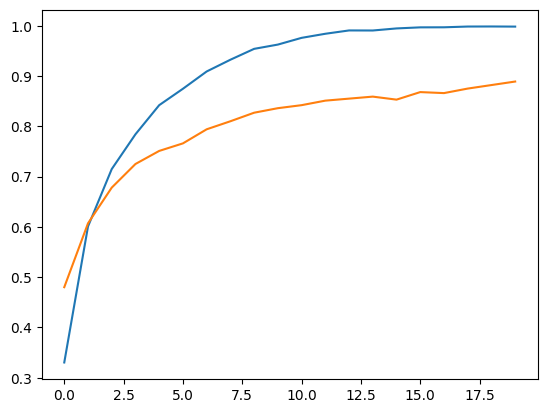

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [18]:
y_pred =[]
y_test =[]
cnt =0
for img_batch, label_batch in test_ds:
    cnt+=1
    pred_batch = model.predict(img_batch)
    y_pred.append(np.argmax(pred_batch, axis=1))
    y_test.append(np.array(label_batch))
y_pred = np.concatenate(y_pred)
y_test = np.concatenate(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

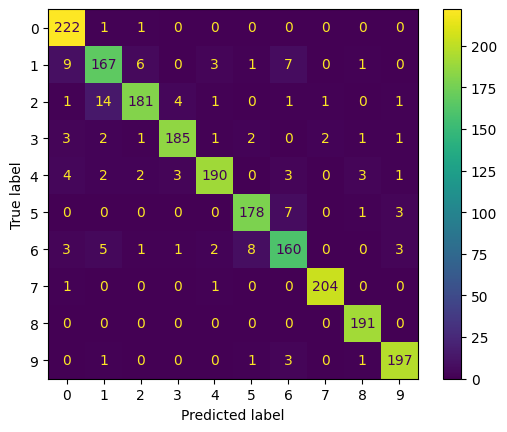

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       224
           1       0.87      0.86      0.87       194
           2       0.94      0.89      0.91       204
           3       0.96      0.93      0.95       198
           4       0.96      0.91      0.94       208
           5       0.94      0.94      0.94       189
           6       0.88      0.87      0.88       183
           7       0.99      0.99      0.99       206
           8       0.96      1.00      0.98       191
           9       0.96      0.97      0.96       203

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


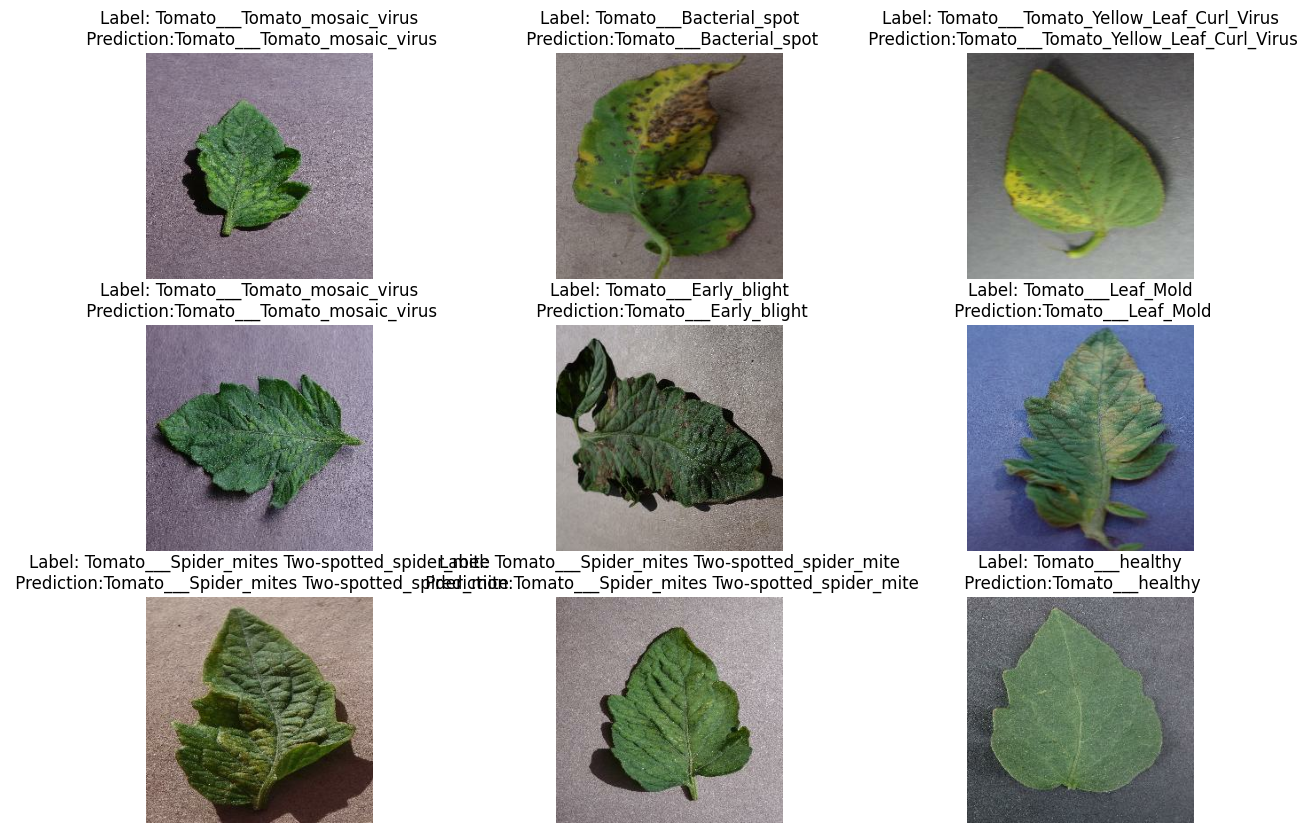

In [24]:
plt.figure(figsize=(15, 10))
for img, label in test_ds.take(1):
    sample_pred = model.predict(img)
    sample_pred_label = np.argmax(sample_pred, axis=1)
    for i in range(10, 19):
        plt.subplot(3, 3, i+1-10)
        plt.imshow(img[i].numpy().astype(int))
        plt.title("Label: " + ds.class_names[label[i].numpy()] +"\n Prediction:"+ ds.class_names[sample_pred_label[i]])
        plt.axis('OFF')

In [32]:
model.save('tomato_leaf_disease_classification_model_vgg16.keras')